<a href="https://colab.research.google.com/github/nhattminh160901/Bai_Tap/blob/main/kpdll/craw_steam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/new_review.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,Unnamed: 0,gameid,helpful,funny,username,owned,numrev,recco,time,posted,content
0,0,1000010,0,0,angantyr,0,1,-1,3.5,"22 November, 2024",A simplified and pay version of stone soup.Mig...
1,1,1000010,1,0,velveteen_dream,0,1,1,75.2,"30 October, 2024",This game is just flat out fun. Tons of weapon...
2,2,1000010,6,0,Bapabooiee,0,304,-1,0.9,"3 October, 2024","Here we go again, another game that on the sur..."
3,3,1000010,8,0,76561198014864761,0,21,-1,44.9,"25 September, 2024",Honestly I was going to give this game a posit...
4,4,1000010,0,0,controlxoxo,0,157,1,8.7,"23 September, 2024",One of the best rouge games I've ever played -...


In [ ]:
df.shape

(3457197, 11)

In [ ]:
# df.drop(df.index[int(df.shape[0]/2):], axis=1, inplace=True)

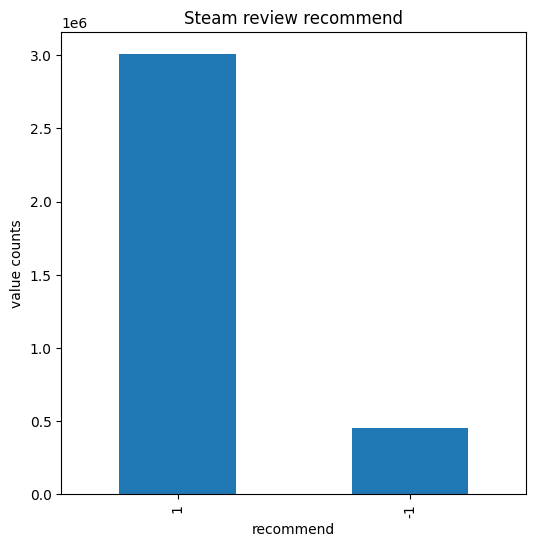

In [ ]:
ax = df['recco'].value_counts().plot(kind='bar', figsize=(6,6))
fig = ax.get_figure()
ax.set_title("Steam review recommend")
ax.set_xlabel('recommend')
ax.set_ylabel('value counts');

In [ ]:
df.loc[df['recco']==-1, 'recco'] = 0

In [ ]:
df.drop(['gameid', 'helpful', 'funny', 'username', 'owned', 'numrev', 'time', 'posted', 'Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df['content'][4]

"One of the best rouge games I've ever played -- a real treat!"

In [ ]:
df.shape

(3457197, 2)

In [ ]:
import sys
sys.getrecursionlimit()
# sys.setrecursionlimit(100000000)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

#split email dataset
X_train, X_test , y_train, y_test = train_test_split(CountVectorizer().fit_transform(df['content'].astype('U').values),
                                                     df['recco'].astype(str).astype(int).values,
                                                     test_size=0.3,
                                                     shuffle=True,
                                                     random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

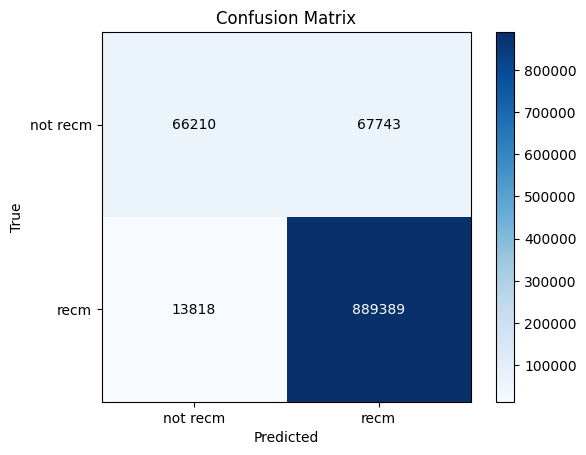

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, average_precision_score

conf_matrix = confusion_matrix(y_test, y_pred)

plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['not recm', 'recm']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
      if conf_matrix[i, j]>np.max(conf_matrix)/2:
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white')
      else:
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy: 0.9213612171699641
Mean Average Precision (mAP): 0.9283298358118609
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.49      0.62    133953
           1       0.93      0.98      0.96    903207

    accuracy                           0.92   1037160
   macro avg       0.88      0.74      0.79   1037160
weighted avg       0.92      0.92      0.91   1037160

ROC AUC: 0.7394895125890238


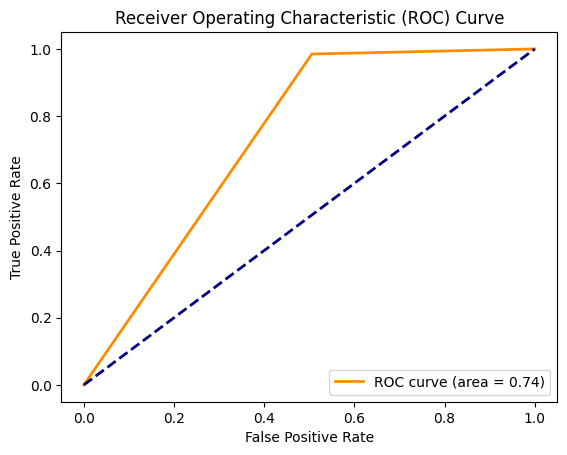

In [ ]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
mAP = average_precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc_curve = auc(fpr, tpr)

# Display metrics
print(f"Accuracy: {accuracy}")
print(f"Mean Average Precision (mAP): {mAP}")
print("Classification Report:")
print(classification_rep)
print(f"ROC AUC: {roc_auc}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_curve))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()